For this assignment, you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you in D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. The second part of assignment 3 has 50 points.


## Exercise 
1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.



In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
from matplotlib import pyplot as plt
from matplotlib import style

In [5]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [9]:
titanic_df = pd.read_csv("titanic (1).csv") 

In [10]:
#dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
titanic_df.describe() #Statistical Analysis of the Data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
titanic_df.head(891)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
total = titanic_df.isnull().sum().sort_values(ascending=False)
percent_1 = titanic_df.isnull().sum()/titanic_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [16]:
titanic_df.columns.values #dataset variables

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


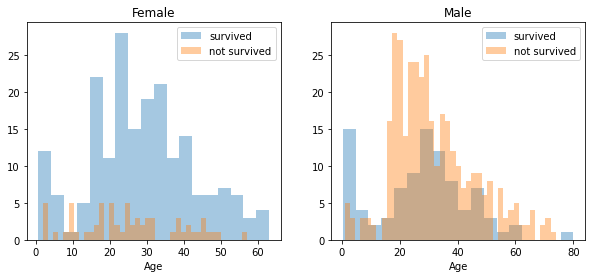

In [19]:
#determining survival rate based on Age and Sex
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic_df[titanic_df['Sex']=='female']
men = titanic_df[titanic_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

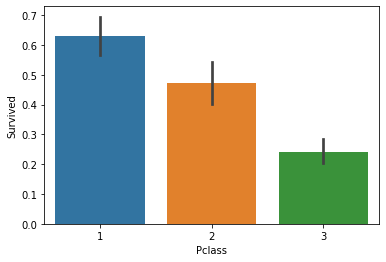

In [20]:
#determining the rate of survival using bar chat and P-Class Variable. P-class is the ticketing structure in the voyage based on socio-economic standing.
sns.barplot(x='Pclass', y='Survived', data=titanic_df)

### Github & D2L Submissions
Please create a **public** github repo and submit your answers on both **public github** and on **D2L**. Please include the link to your github repo in your submission. 

**Please follow the below guidelines regarding your github repository:**

The folder structure of your github account should be as followed:
                    
    ├── src                     # Source files (your python code)
    ├── data                    # Data related to the project (titanic.csv)
    ├── result                  # Result of the project (e.g., plots, reports)
    └── doc                     # Documentation files (additional documentations)

You must add **README.md** file to the root repository of your GitHub and explain all the directories in your GitHub repo in README file. Please look at this link as a [reference](https://help.github.com/en/github/creating-cloning-and-archiving-repositories/about-readmes) on how to write the README file.

Here is another great resource for organizing your folder and code on github. Reso

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, your final report and the structure of your github repo. 